# Mini projet : Data Visualisation

## Introduction

L'objectif de ce mini projet est de présenter une visualisation des données et voir s'il y a un effet sur la germination des graines de la caméra, du banc de germination, ou du positionnement des graines.
Les données sont composées:

   - d'une variable "Banc": indique le numéro du banc est où l'expérience est réalisée.
   - d'une variable "Pop": indique le groupe de graines qui est pris en compte.
   - d'une variable "Echantillon": c'est un échantillon d'une population.
   - des variables "rep" et "N°rep": correspondent aux différentes expériences en changeant cetraines variables.
   - d'une variable "caméra": indique la caméra utilisée pour l'expérience.
   - d'une variable "semis": elle varie entre 1 et 5.
   - d'une variable "zone": indique la zone où l'on observe l'expérimentation.
   - des variables "5°C TMG (h)" et "5°C TMG (j)": ce sont les temps moyens de germination des graines en heures et en jours sous 5°C.
   - des variables "5°C T50 (h)" et "5°C T50 (j)": ce sont les temps en heures et en jours auxquels 50% des graines ont               germées.
   - d'une variable "Aire sous la courbe": représente l'aire sous la courbe.
   - des variables "15 j",..., et "21 j": représentent les nombres de graines germées au bout de i jours.

### Librairies et préambules

Pour commencer, nous préparons les données à notre analyse. Pour cela :
    - nous conservons les variables à expliquer 'Camera', 'Banc', 'Zone', 'Pop' (Nous ne nous intéressons pas ici aux variables 'Echantillon', 'rep', 'semis')
    - nous enlevons les variables '5°C T50' pour lesquels il manque énormément de données
    - nous conservons les variables explicatives '5°C TMG (j)', 'Aire sous la courbe', '15j', ..., '21j'
    
Nous conservons ensuite deux bases de données :
    - data_inst : la base de données obtenue
    - data_vit : la base de données obtenue à laquelle nous passons les valeurs '15j', ...,'21j' en vitesse de croissance quotidienne '15_16', ..., '20_21', de cette manière nous enlevons une dimension au problème 

In [2]:
# TRAITEMENT DE DONNÉES
import pandas as pd
import numpy as np
# GRAPHIQUES
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
from matplotlib.lines import Line2D

In [3]:
data_vit = pd.read_csv("data_vit.csv",sep=";")
data_inst = pd.read_csv("data_inst.csv",sep=";")
jours = ['15_16','16_17','17_18','18_19','19_20','20_21']

In [60]:
data_vit.head()

,Bancs,Pop,Camera,Zone,TMG5,aire,15_16,16_17,17_18,18_19,19_20,20_21
0,3,Témoin,1,11,17.25,2652.0,12.0,4.0,4.0,8.0,4.0,4.0
1,3,Témoin,2,11,17.95,2652.0,4.0,0.0,8.0,12.0,4.0,0.0
2,3,Témoin,3,11,15.95,2652.0,4.0,8.0,0.0,0.0,4.0,4.0
3,3,Témoin,4,11,17.50,2652.0,0.0,0.0,0.0,8.0,4.0,0.0
4,4,Témoin,1,11,18.04,2646.0,0.0,12.0,0.0,8.0,8.0,4.0


### ACP

Nous avons une base de données "data_vit" composée de 12 variables :
    - 4 variables qualitatives à expliquer
    - 8 variables quantitatives explicatives

Nous nous proposons de réduire le nombre de dimensions du problème en faisant une ACP.

In [4]:
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
M = np.array(data_vit.copy()[['TMG5','aire','15_16','16_17','17_18','18_19','19_20','20_21']])
M = StandardScaler().fit_transform(M) # pour centrer et réduire les données
pca = PCA(n_components=8)
acp = pca.fit_transform(M)
var = pca.explained_variance_ratio_
var_cum = np.cumsum(var)
index_acp = ["Composante "+str(i) for i in range(1,9)]
resacp = pd.DataFrame({'Variance':var,'Variance cumulée':var_cum},index=index_acp)
resacp

,Variance,Variance cumulée
Composante 1,0.272186,0.272186
Composante 2,0.192710,0.464895
Composante 3,0.125427,0.590323
Composante 4,0.113218,0.703541
Composante 5,0.106620,0.810161
Composante 6,0.099497,0.909658
Composante 7,0.069019,0.978678
Composante 8,0.021322,1.000000


On peut alors représenter visuellement la quantité d'information conservée par les composantes de l'ACP.

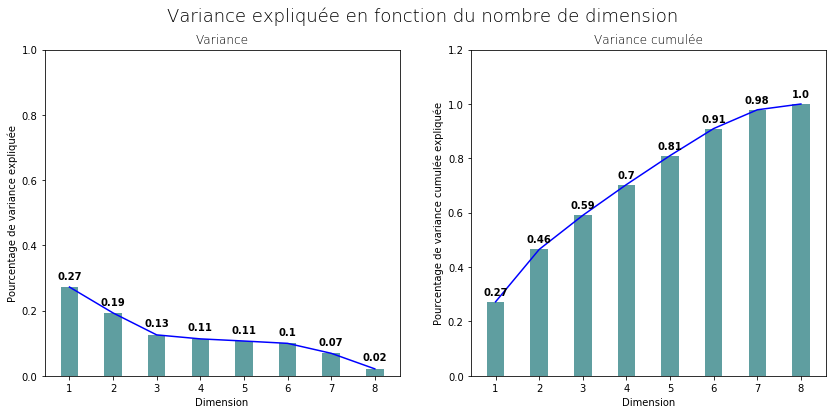

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Variance expliquée en fonction du nombre de dimension",
             fontweight="ultralight",fontsize=18)
# VARIANCE
ax1.bar(list(range(1,9)),var,width=0.4,color="cadetblue")
ax1.plot(list(range(1,9)),var,'blue')
ax1.set_title("Variance",fontweight="ultralight")
ax1.set_xlabel("Dimension")
ax1.set_ylabel("Pourcentage de variance expliquée")
ax1.set_ylim(0,1)
for i in range(1,9):
    ax1.text(i, var[i-1]+0.025, round(var[i-1],2), ha='center', fontweight="bold")
# VARIANCE CUMULEE
ax2.bar(list(range(1,9)),var_cum,width=0.4,color="cadetblue")
ax2.plot(list(range(1,9)),var_cum,'blue')
ax2.set_title("Variance cumulée",fontweight="ultralight")
ax2.set_xlabel("Dimension")
ax2.set_ylabel("Pourcentage de variance cumulée expliquée")
ax2.set_ylim(0,1.2)
for i in range(1,9):
    ax2.text(i, var_cum[i-1]+0.025, round(var_cum[i-1],2), ha='center', fontweight="bold")

La variance expliquée par l'ACP est très faible, la réduction de dimension n'est donc pas efficace car la quantité d'information conservée par les premières composantes est très faible. Cela nous indique que les variables sont peu corrélées entre-elles.

## I - Effet des bancs sur la germination des graines:

Pour commencer, nous étudions l'effet des bancs sur la germination des graines.
Après une analyse des effets possibles des variables explicatives sur chaque banc, nous décidons de tracer un nuage de points représentant l'aire sous la courbe en fonction du temps moyen de germination dans lequel la couleur différencie le banc concerné par l'individu et la taille du point représente la vitesse moyenne journalière de croissance.

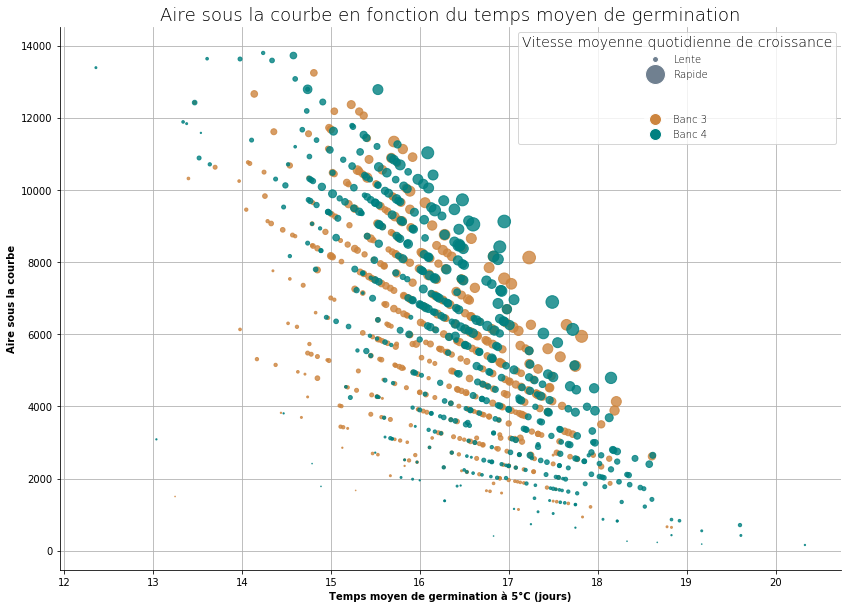

In [34]:
X = data_vit.copy()
Y = X[jours]
Y = Y.apply(np.mean,axis=1)
X = pd.concat([X[['Bancs','Pop','Camera','Zone','TMG5','aire']],Y],axis=1)
X = X.drop([867]) # On enlève la ligne qui se comporte bizarrement
X = X.rename(columns={0: "VitMoy"})
X = X.drop(["Zone","Camera"], axis=1)
df = X.copy()


couleurs = ["peru","teal"]
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
ax.grid()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Aire sous la courbe en fonction du temps moyen de germination",fontweight="ultralight",fontsize=18)
for i in range(3,5):
    Y = X[X.Bancs==i]
    ax.scatter(Y.TMG5,Y.aire,s=Y.VitMoy**2,alpha=0.8,c=couleurs[i-3])
ax.set_ylabel('Aire sous la courbe',fontweight="bold")
ax.set_xlabel('Temps moyen de germination à 5°C (jours)',fontweight="bold")
lg = [Line2D([0],[0],marker='o',color='w',label='Lente',markerfacecolor='slategrey',markersize=6),
      Line2D([0],[0],marker='o',color='w',label='Rapide',markerfacecolor='slategrey',markersize=20),
      Line2D([0],[0],color='w',label='',markerfacecolor='w'),
      Line2D([0],[0],color='w',label='',markerfacecolor='w'),
      Line2D([0],[0],marker='o',color='w',label='Banc 3',markerfacecolor='peru',markersize=12),
      Line2D([0],[0],marker='o',color='w',label='Banc 4',markerfacecolor='teal',markersize=12)]

lgd = ax.legend(handles=lg,title="Vitesse moyenne quotidienne de croissance",
                fontsize=14,fancybox=True,prop={'weight':'ultralight'})
lgd.get_title().set_fontsize(14)
lgd.get_title().set_fontweight('ultralight')
ax.set_axisbelow(True)

On voit que le nuage de points ne fait apparaître aucune distinction quelque soit la variable étudiée. Pour aller plus loin, nous avons distinguer les populations étudiées. Cela nous conforte dans l'idée que le banc n'influe pas sur la vitesse de germination. En distinguant les populations étudiées, nous remarquons que pour la population 815, nous obtenons les informations suivantes sur le nombre de graines germées au cours du temps :

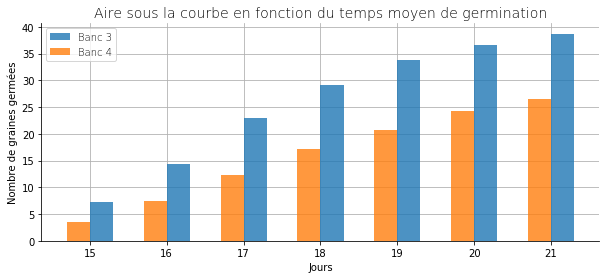

In [38]:
X = data_inst.copy()
X = X[X.Pop=="815"]
X = X.groupby("Bancs").mean()
B3 = list(X.loc[3])[4:]
B4 = list(X.loc[4])[4:]

fig, ax = plt.subplots(figsize=(10,4))
rects1 = ax.bar(np.arange(15,22)+0.15, B3, width=0.3, label='Banc 3', alpha=0.8)
rects2 = ax.bar(np.arange(15,22)-0.15, B4, width=0.3, label='Banc 4', alpha=0.8)
ax.set_xlabel('Jours')
ax.set_ylabel('Nombre de graines germées')
ax.set_title("Population 815")
ax.legend(prop={'weight':'light'})
ax.set_title("Aire sous la courbe en fonction du temps moyen de germination",fontweight="ultralight",fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid()
ax.set_axisbelow(True)

Pour cette population (uniquement celle-ci), on voit un effet du banc sur la germination des graines.

## II - Effet des caméras sur la germination des graines:

Ensuite, nous étudions l'effet des caméras sur la germination des graines.
Pour cette variable, nous décidons de représenter, pour chaque population, l'évolution du nombre de graines germées au cours du temps.

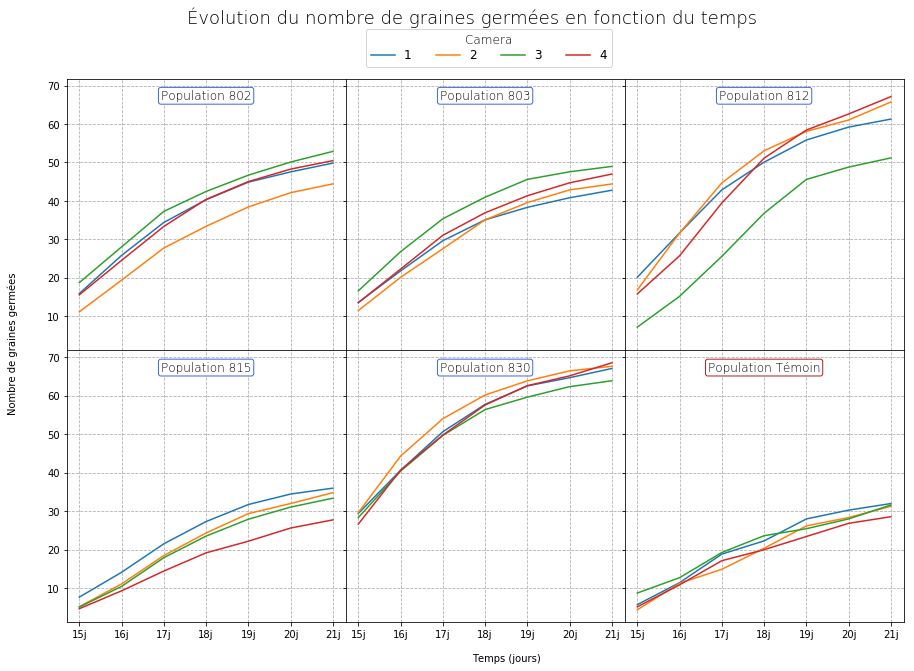

In [12]:
X = data_inst.copy()
X = X.drop(["Zone","Bancs","TMG5","aire"], axis=1)
fig, axs = plt.subplots(2,3,sharex=True,sharey=True,gridspec_kw={'wspace':0,'hspace':0},
                        figsize=(15,10))
fig.suptitle("Évolution du nombre de graines germées en fonction du temps",
             fontweight="ultralight",fontsize=18)
couleurs = ["royalblue","royalblue","royalblue","royalblue","royalblue","firebrick"]
K=0
for p in np.unique(X["Pop"]):
    row, col = K//3, K%3
    Y = X[X["Pop"]==p]
    Y = Y.groupby("Camera").mean()
    axs[row,col].grid(linestyle='--')
    axs[row,col].grid(linestyle='--')
    axs[row,col].set_title(f"Population {p}",y=0.9, fontweight="light",
       bbox=dict(boxstyle="round,pad=0.2", fc="white", ec=couleurs[K]))
    for i in range(4):
        axs[row,col].plot(Y.loc[i+1])
    K+=1
lgd = fig.legend(["1","2","3","4"],title="Camera",ncol=4,fontsize=12,
           loc=(0.4,0.9),labelspacing=0.25)
lgd.get_title().set_fontsize(12)
lgd.get_title().set_fontweight('ultralight')
a = fig.text(0.07,0.6,"Nombre de graines germées",rotation=90)
a = fig.text(0.5,0.07,"Temps (jours)")

Pour la majorité des populations, on ne remarque pas d'effet de la camera sur la germination des graines. Cependant, pour la population 812, on remarque que les graines sur la caméra 3 germent à la même vitesse que celles sur les autres caméras mais elles partent avec une valeur initiale bien plus faible.

## III - Effet de la zone sur la germination des graines:

Pour finir, nous étudions l'effet de la zone sur la germination des graines.
Pour cette variable, nous décidons tout d'abord de scinder la variable en 2, car en réalité sur la zone "11", nous avons deux indications :
    - Position "1" en abscisses
    - Position "1" en ordonnées
Nous pouvons alors représenter les variables explicatives sur une heatmap. Ces représentations ne nous indiquent aucune information hormis pour la variable 'Aire sous la courbe'.

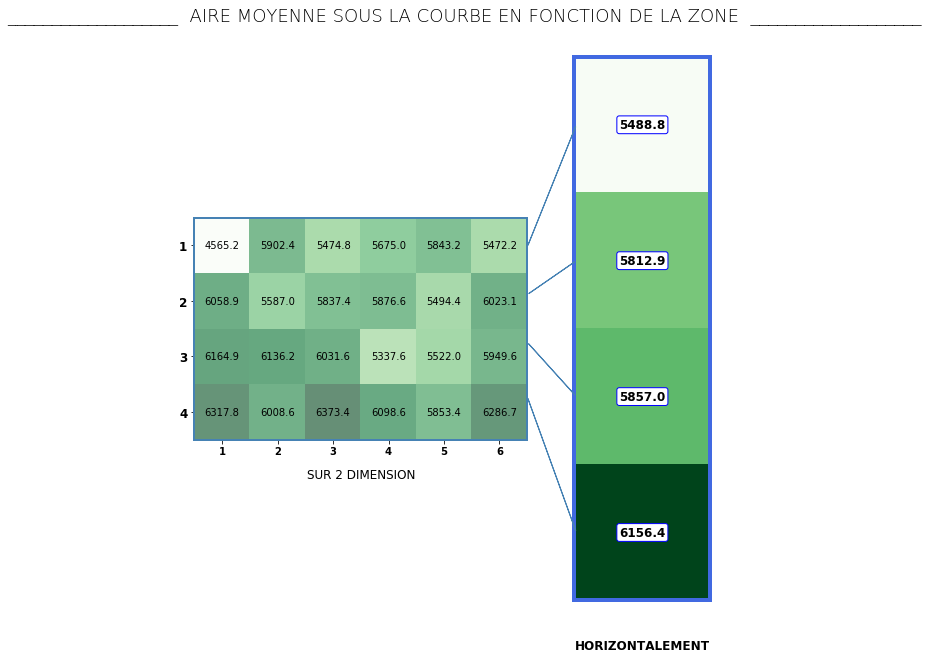

In [22]:
X = data_vit.copy()[["Zone","aire","TMG5"]]

def separate(listzone):
    L1 = []
    L2 = []
    for i in listzone:
        c = str(i)
        L1.append(int(c[0]))
        L2.append(int(c[1]))
    return L1, L2 


X = X.groupby("Zone").mean()
X["Zx"], X["Zy"] = separate(X.index)
M_aire = np.zeros((4,6))
for i in range(1,5):
    Y = X[X.Zx==i]
    for j in range(1,7):
        M_aire[i-1,j-1] = float(Y[Y.Zy==j].aire)
        
fig = plt.figure(figsize=(10, 10))
fig.suptitle("___________________  AIRE MOYENNE SOUS LA COURBE EN FONCTION DE LA ZONE  ___________________",
             fontsize=18,y=0.95,weight='light')
grid = plt.GridSpec(10, 10, figure=fig, wspace=0.1)
boite = dict(boxstyle="round,pad=0.2", fc="white", ec="b")
ax1 = fig.add_subplot(grid[:,:-4])
ax1X = fig.add_subplot(grid[:,-4:])
ax1.matshow(M_aire, cmap=plt.cm.Greens, alpha=0.6)
ax1.set_xticks(range(6))
ax1.set_xticklabels(['1','2','3','4','5','6'],{'fontweight':"bold"})
ax1.set_yticks(range(4))
ax1.set_yticklabels(['1','2','3','4'], {'fontsize':12,'fontweight':"bold"})
ax1.set_title("SUR 2 DIMENSION",y=-0.2)
ax1.xaxis.set_ticks_position("bottom")
plt.setp(ax1X.spines.values(), linewidth=4, color='royalblue')
plt.setp(ax1.spines.values(), linewidth=2, color='steelblue')
M_aire_moyY = np.transpose(np.array([np.mean(M_aire,axis=1)]))
for i in range(4):
    ax1X.text(0, i, round(M_aire_moyY[i,0],1), ha="center", va="center",
              fontdict={'fontsize':12,'fontweight':"bold"}, bbox=boite)
    for j in range(6):
        ax1.text(j, i, round(M_aire[i,j],1), ha="center", va="center", fontsize=10)
ax1X.matshow(M_aire_moyY, cmap=plt.cm.Greens)
ax1X.set_title("HORIZONTALEMENT",y=-0.1,fontdict={'fontweight':"bold"})
ax1X.set_xticks([])
ax1X.set_yticks([])

ax0tr = ax1.transData
ax1tr = ax1X.transData
figtr = fig.transFigure.inverted()
L1 = [(5.5, 0.9),(5.5, 1.25),(5.5,1.6),(5.5,2)]
L2 = [(-0.3, 0.),(-0.3, 1.),(-0.3,2.),(-0.3,3.)]

for i in range(4):
    ptB = figtr.transform(ax0tr.transform(L1[i]))
    ptE = figtr.transform(ax1tr.transform(L2[i]))
    arrow = ptch.FancyArrowPatch(ptB, ptE, transform=fig.transFigure, color="steelblue")
    fig.patches.append(arrow)

Cette représentation nous suggère une influence verticale de la zone sur la germination. Nous remarquons également, une aire sous la courbe très faible en zone "11".
Cependant, si la moyenne croît effectivement, cela ne traduit pas un effet de la zone sur la germination, comme nous pouvons le voir dans la représentation suivante.

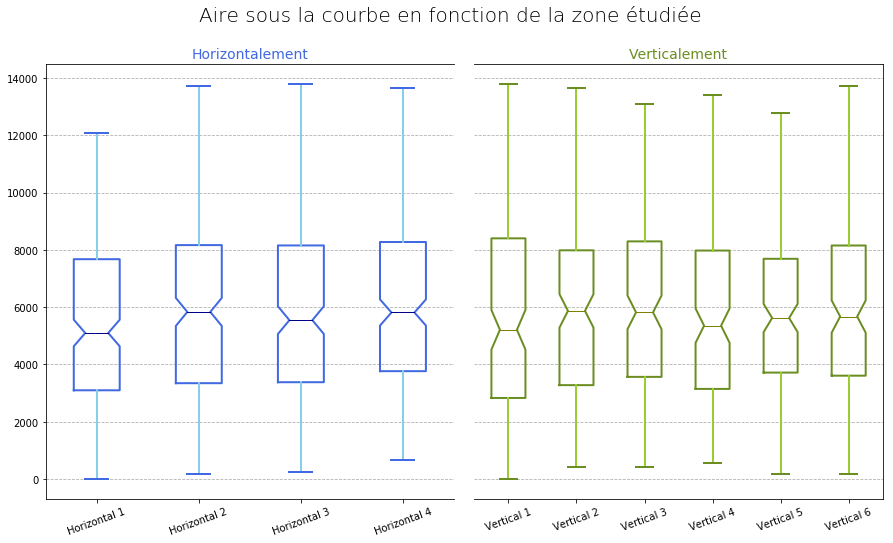

In [55]:
X = data_vit.copy()
Y = X[jours]
Y = Y.apply(np.mean,axis=1)
X = pd.concat([X[['Bancs','Pop','Camera','Zone','TMG5','aire']],Y],axis=1)
X = X.rename(columns={0: "VitMoy"})
X = X.drop(["Bancs"], axis=1)
X = X.drop(["Camera"], axis=1)
X_base = X.copy()

# On scinde la variable zone en deux variables zone_x et zone_y
def extractfirst(x):
    c = str(x)
    return int(c[0])

def extractsecond(x):
    c = str(x)
    return int(c[1])

X = X_base.copy()
X["Zone"] = X["Zone"].map(extractsecond)
M_aire_2 = np.zeros((160,6))
for i in range(6):
    Y = X[X.Zone==i+1]
    M_aire_2[:,i] = Y.aire
X = X_base.copy()
X["Zone"] = X["Zone"].map(extractfirst)
M_aire_1 = np.zeros((240,4))
for i in range(4):
    Y = X[X.Zone==i+1]
    M_aire_1[:,i] = Y.aire


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'wspace': 0.05},
     figsize=(15,8))
fig.suptitle('Aire sous la courbe en fonction de la zone étudiée',fontsize=20,weight='ultralight')

ax1.set_title("Horizontalement",color="royalblue",fontsize=14)
ax1.grid(axis='y',linestyle='--')
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='x', rotation=20)
bp = ax1.boxplot(M_aire_1,notch=1)
ax1.set_xticklabels(['Horizontal 1', 'Horizontal 2', 'Horizontal 3', 'Horizontal 4'])
for box in bp['boxes']:
    box.set( color='royalblue', linewidth=2)
for whisker in bp['whiskers']:
    whisker.set(color='skyblue', linewidth=2)
for cap in bp['caps']:
    cap.set(color='royalblue', linewidth=2)
for median in bp['medians']:
    median.set(color="darkblue")

ax2.set_title("Verticalement",color="olivedrab",fontsize=14)         
ax2.grid(axis='y',linestyle='--')
ax2.spines['left'].set_visible(False)
ax2.tick_params(left=False)
ax2.tick_params(axis='x', rotation=20)
bp = ax2.boxplot(M_aire_2,notch=1)
ax2.set_xticklabels(['Vertical 1','Vertical 2','Vertical 3','Vertical 4','Vertical 5','Vertical 6'])
for box in bp['boxes']:
    box.set( color='olivedrab', linewidth=2)
for whisker in bp['whiskers']:
    whisker.set(color='yellowgreen', linewidth=2)
for cap in bp['caps']:
    cap.set(color='olivedrab', linewidth=2)
for median in bp['medians']:
    median.set(color="olive")

On remarque ici que quelque soit la zone, il n'y a pas de différence de germination. Les variations sur la moyenne ne sont en fait aucunement représentatives car les variances sont très grandes. 

## Conclusion

Notre objectif était de savoir s’il y avait une variabilité de la germination des graines selon les bancs, les caméras et les zones. 
Nous avons commencé par une ACP pour voir si il y avait des corrélations entre les variables afin de faire une réduction de dimension. Cette méthode n'a pas aboutie pour ce jeu de données. Nous avons donc étudié, pour chaque question, les éventuels effets des variables sur la germination des graines.

Pour conclure, on ne remarque pas de différence générale de germination quelque soit le banc, la caméra ou la zone.
Cependant, pour certaines populations, il peut y avoir quelques variations :
    - La population 815 sur le banc 3
    - La population 812 sur la caméra 3

# Datavisualisation avec 'ggplot2'

Nous utilisons la librairie 'ggplot2' de R pour recoder les graphiques faits précédemment.

### Banc

On utilise la librairie 'IPython.display' pour afficher les images issues de 'ggplot'.

In [ ]:
from IPython.display import Image

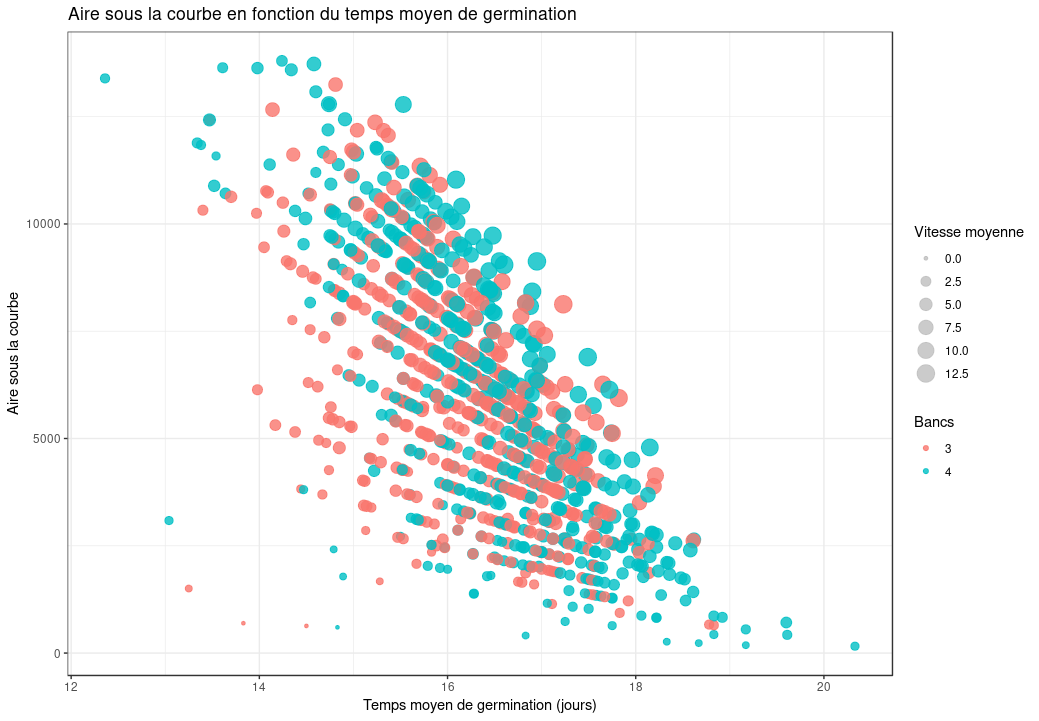

In [42]:
Image("Banc.png")

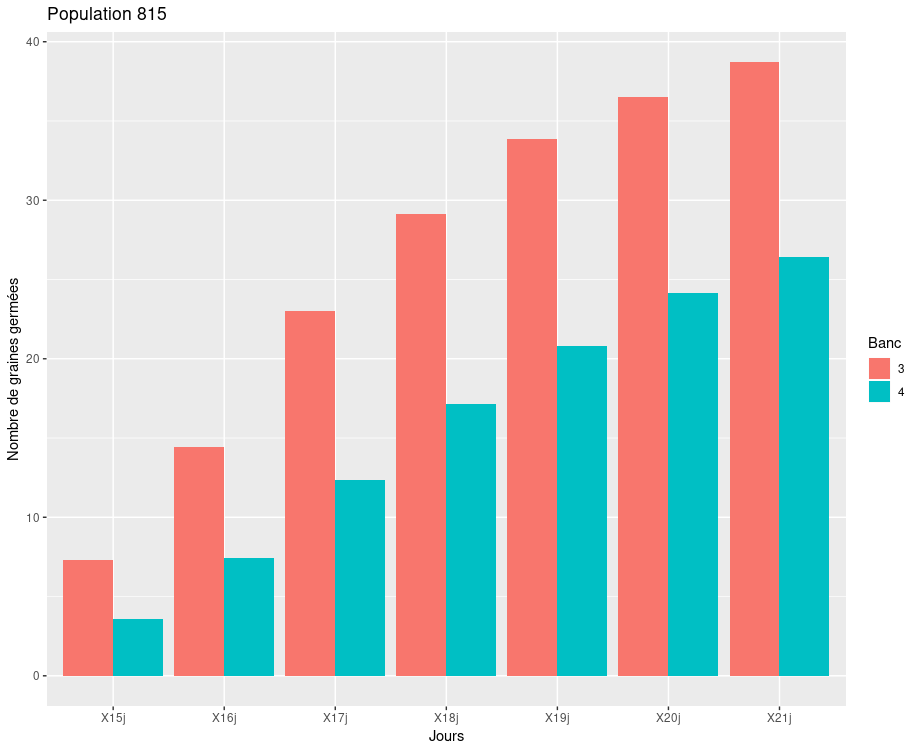

In [43]:
Image("Banc_hist815.png")

### Camera

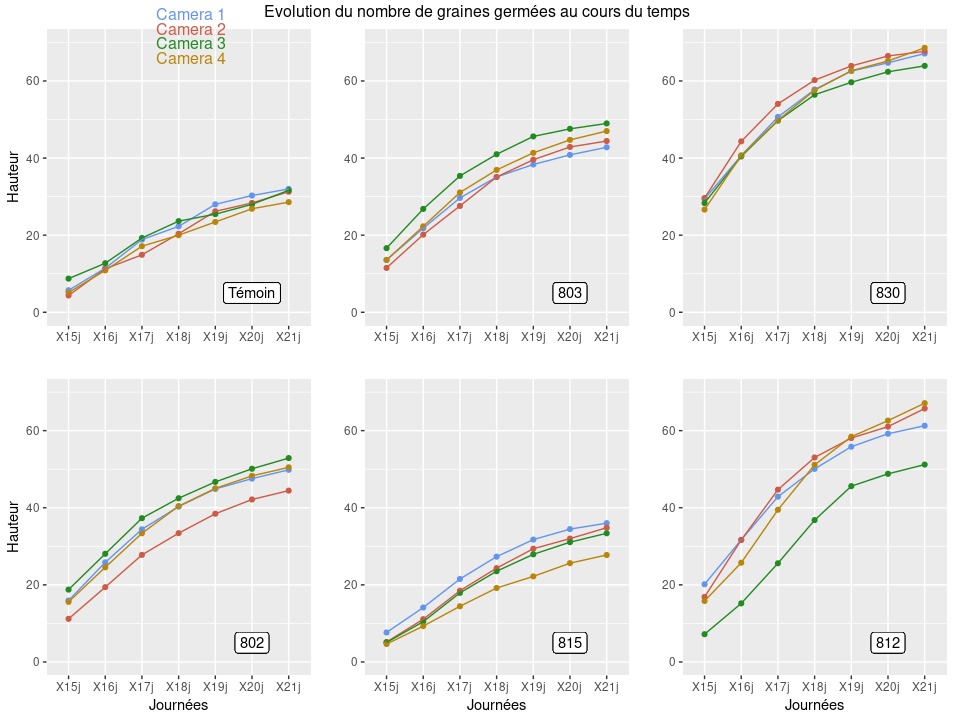

In [44]:
Image("Camera.png")

### Zone

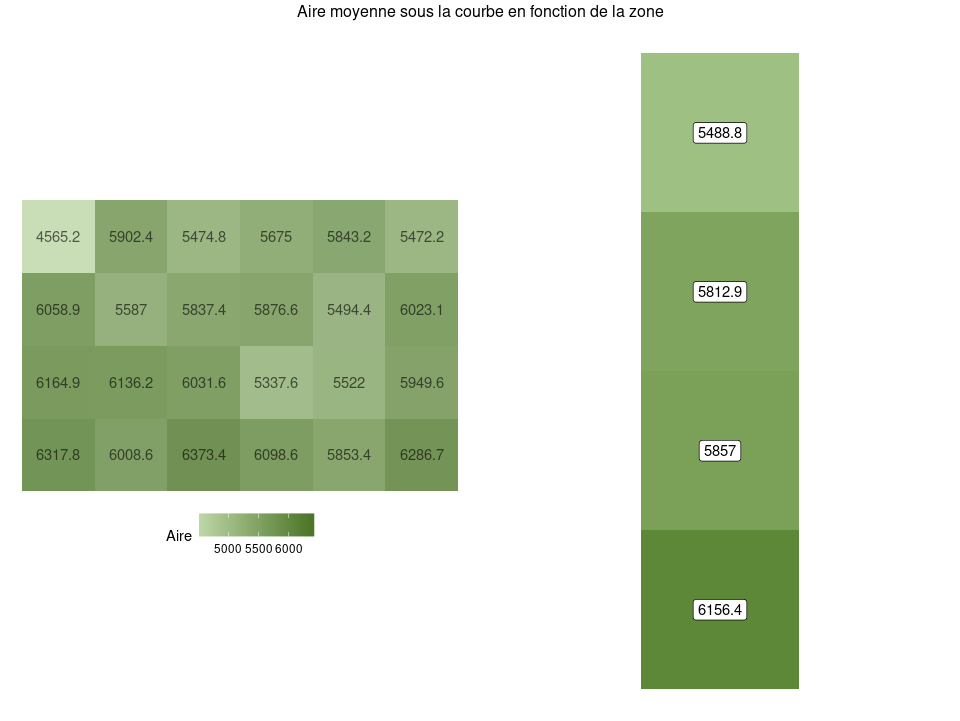

In [45]:
Image("Zone_map.png")

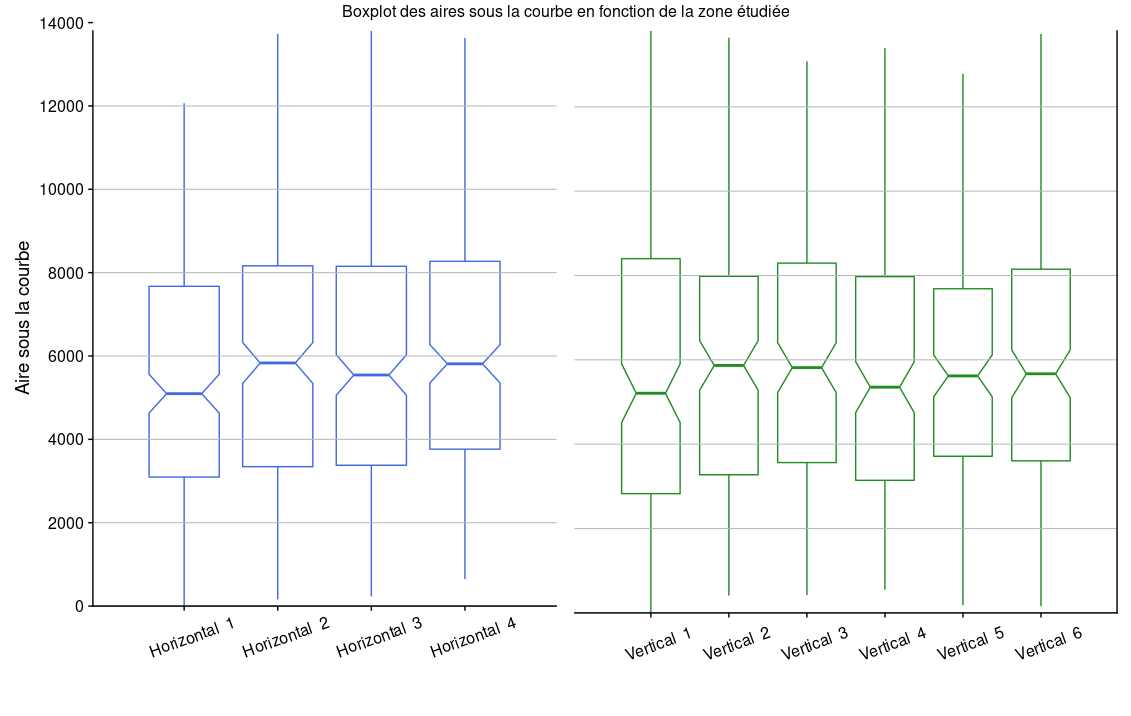

In [46]:
Image("Zone_boxplot.png")

### Code

In [ ]:
"""
library(ggplot2)
library(dplyr)
library(ggthemes)
library(gridExtra)
library(cowplot)
library(caroline)
library(grid)
library(stringr)
library(reshape2)
library(RColorBrewer)

data1 = read.csv("data_vit.csv",sep=";")
data2 = read.csv("data_inst.csv",sep=";")
data1$Bancs = as.factor(data1$Bancs)
data1$Camera = as.factor(data1$Camera)
data1$Zone = as.factor(data1$Zone)
data2$Bancs = as.factor(data2$Bancs)
data2$Camera = as.factor(data2$Camera)
data2$Zone = as.factor(data2$Zone)
jours = c('X15_16','X16_17','X17_18','X18_19','X19_20','X20_21')
j = c("X15j","X16j","X17j","X18j","X19j","X20j","X21j")


# BANCS

# 1

X = data1
Y = X %>% select(jours)
Y = apply(as.matrix(Y),1,mean)
X = cbind(X[1:6],Y)
X = X[-c(868),]
colnames(X)[7] = "VitMoy"
X = X[c(1:2,5:7)]


ggplot(X,aes(TMG5,aire,VitMoy)) +
  geom_point(aes(col=Bancs,size=VitMoy),alpha=0.8) +
  labs(x="Temps moyen de germination (jours)",y="Aire sous la courbe",
       title="Aire sous la courbe en fonction du temps moyen de germination",
       size="Vitesse moyenne") +
  guides(size=guide_legend(override.aes=list(colour="grey"))) +
  theme_bw()


# 2

X = data2
X = X[X$Pop=="815",]
X = melt(as.matrix(groupBy(X,by="Bancs",clmns=j,aggregation=rep("mean",7))))
X$Var1 = as.factor(X$Var1)
ggplot(X, aes(x=Var2,y=value,fill=Var1)) + geom_bar(stat='identity', position='dodge') +
  theme_grey() +
  labs(x="Jours",y="Nombre de graines germées",title="Population 815",fill="Banc")

# CAMERAS


X = data2
X = X[c(2:3,7:13)]
popu = unique(X$Pop)
N = length(popu)


G = list()
for (k in 1:N){
  Y = X[X$Pop==popu[k],]
  Y = groupBy(Y,by="Camera",clmns=j,
              aggregation=rep("mean",7))
  Y = data.frame(t(as.matrix(Y)))
  g = ggplot(Y,aes(group=1)) +
    geom_point(aes(x=j,y=X1),col="cornflowerblue") +
    geom_point(aes(x=j,y=X2),col="coral3") +
    geom_point(aes(x=j,y=X3),col="forestgreen") +
    geom_point(aes(x=j,y=X4),col="darkgoldenrod") +
    geom_line(aes(x=j,y=X1),col="cornflowerblue") +
    geom_line(aes(x=j,y=X2),col="coral3") +
    geom_line(aes(x=j,y=X3),col="forestgreen") +
    geom_line(aes(x=j,y=X4),col="darkgoldenrod") +
    geom_label(label=popu[k],x=6,y=5) +
    scale_y_continuous(limits=c(0., 70.)) +
    theme_gray()
  if (k %in% c(1,4)){g = g + labs(y="Hauteur")}
  else {g = g + labs(y="")}
  if (k %in% c(4,5,6)){g = g + labs(x="Journées")}
  else {g = g + labs(x="")}
  G[[k]] = g
}
print(grid.arrange(G[[1]],G[[2]],G[[3]],G[[4]],G[[5]],G[[6]],ncol=3,
            top = "Evolution du nombre de graines germées au cours du temps"))
grid.text("Camera 1",
          x=unit(0.2,"npc"),y=unit(.98,"npc"),gp=gpar(col="cornflowerblue"))
grid.text("Camera 2",
          x=unit(0.2,"npc"),y=unit(.96,"npc"),gp=gpar(col="coral3"))
grid.text("Camera 3",
          x=unit(0.2,"npc"),y=unit(.94,"npc"),gp=gpar(col="forestgreen"))
grid.text("Camera 4",
          x=unit(0.2,"npc"),y=unit(.92,"npc"),gp=gpar(col="darkgoldenrod"))



# ZONE

# 1

X = data1[4:6]
X = groupBy(X,by="Zone",clmns=c("TMG5","aire"),aggregation=rep("mean",2))
Zx = c()
Zy = c()
for (z in rownames(X)){
  Zx = c(Zx,as.integer(str_sub(z,1,1)))
  Zy = c(Zy,as.integer(str_sub(z,2,2)))
}
X = cbind(X,Zx,Zy)
M = matrix(0,4,6)
for (z1 in 1:4){
  Y = X[X$Zx==z1,]
  for (z2 in 1:6){
    M[z1,z2] = as.numeric(Y[Y$Zy==z2,])[2]
  }
}
Mat = melt(M)
Mat4 = melt(matrix(apply(M,1,mean)))

bp1 = ggplot(Mat, aes(x=Var2, y=Var1, fill=value)) + 
        geom_tile(alpha=0.8) + coord_fixed(ratio = 1) +
        geom_text(aes(label=round(value,1)),alpha=0.6) +
        scale_y_reverse() +
        scale_fill_gradient(low="#bbd5a5", high="#4c7628") +
        theme_void() + theme(legend.position="bottom") +
        labs(fill="Aire")

bp2 = ggplot(Mat4, aes(x=Var2, y=Var1, fill=value)) + 
        geom_tile() + coord_fixed(ratio = 1) +
        geom_label(aes(label=round(value,1)),bg="white") +
        scale_y_reverse() +
        scale_fill_gradient(low="#9fc083", high="#5d8838") +
        theme_void() + theme(legend.position='none') +
        labs(fill="Aire")

grid.arrange(bp1,bp2,ncol=2,
             top = "Aire moyenne sous la courbe en fonction de la zone")

# 2

X = data1[4:6]
Zx = c()
Zy = c()
for (z in X$Zone){
  Zx = c(Zx,as.integer(str_sub(z,1,1)))
  Zy = c(Zy,as.integer(str_sub(z,2,2)))
}
X = cbind(X,Zx,Zy)
M1 = matrix(0,240,4)
M2 = matrix(0,160,6)
for (i in 1:4){
  Y = X[X$Zx==i,]
  M1[,i] = Y$aire
}
for (i in 1:6){
  Y = X[X$Zy==i,]
  M2[,i] = Y$aire
}
M1 = melt(M1)
M2 = melt(M2)

bp1 = ggplot(M1) +
          geom_boxplot(aes(x=Var2,y=value,group=Var2),fill='white',color="royalblue",
                notch=TRUE) +
          labs(x="") + 
          theme(panel.background = element_rect(fill = NA),
                panel.grid.major.y = element_line(colour = "#b6b6b6"),
                panel.ontop = TRUE,
                axis.text.x = element_text(angle=20)) +
          scale_y_discrete("Aire sous la courbe", limits=seq(0,14000,2000)) +
          scale_x_discrete(position="right",name="",
                   limits=paste("\nHorizontal ",1:4))

bp2 = ggplot(M2) +
          geom_boxplot(aes(x=Var2,y=value,group=Var2),fill='white',color="forestgreen",
                notch=TRUE) +
          theme(axis.title.y=element_blank(),
                axis.text.y=element_blank(),
                axis.ticks.y=element_blank()) +
          theme(panel.background = element_rect(fill = NA),
                panel.grid.major.y = element_line(colour = "#b6b6b6"),
                panel.ontop = TRUE,
                axis.text.x = element_text(angle=20)) +
          scale_y_discrete(limits=seq(0,14000,2000),position="right") +
          scale_x_discrete(position="right",name="",
                           limits=paste("\nVertical ",1:6))
      
grid.arrange(bp1,bp2,ncol=2,
             top = "Boxplot des aires sous la courbe en fonction de la zone étudiée")
"""